# Project: Investigate a Dataset - No Show Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


The dataset **No Show Appointments** collects information from more than 100.000 medical appointments in Brazil. A number of characteristics about the patients are included in each row. Below you'll find a list of all columns of the dataset.

1. **PatientId**: Identification of a patient
2. **AppointmentID**: Identification of an appointment
3. **Gender**: Male or female 
4. **SchedueledDay**: The day the patient sets up their doctors appointment
5. **ApointmentDay**: The day the patient has to attend the doctors appointment 
6. **Age**: The age of the patient
7. **Neighbourhood**: The location where the appointment takes place
8. **Scholarship**: True of false, whether the patient receives financial aid from the social welfare program "Bolsa Família", which is provided by the Brazilian government. You'll find further information [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
9. **Hipertension**: 1 (true) or 0 (false), whether the patient suffers from illness "Hipertension"
10. **Diabetes**: 1 (true) or 0 (false), whether the patient suffers from illness "Diabetes"
11. **Alcoholism**: 1 (true) or 0 (false), whether the patient suffers from illness "Alcoholism"
12. **Handcap**: Number of disabilities a patient has, stated from 0 to 4. 
13. **SMS_received**: 1 (true) or 0 (false), whether the patient received a reminder for the doctors appointment via SMS. 
14. **No-show**: Yes (not attended) or No (attended), whether the patient attended the doctors appointment. 




### Question(s) for Analysis

In this project we'll focus on the question of whether or not patients show up for their doctors appointment. In particular, we'll be interested in finding trends among the patients who attended and how they differed from the patients who didn't attend.

For this porpose, we'll answer the following sub-questions: 
- How many patients of the dataset attended their appointment in total?
- Does the attendence depend on gender and age? 
- Does the attendence depend on a particular illness?
- Does the attendence depend on the receipt of the financial aid from "Bolsa Família"?
- Are there more correlations between those variables - for example between illness and age? 
- Does the attendence depend on a the timeframe between scheduling and the actual appointment date?

In [1]:
# First we are using this cell to set up import statements for all of the packages that we
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

In the following section we will explore and clean the dataset. This is necessary to make our analysis and visualizations work and subsequently to answer the questions for our analysis. 


### General Properties
First we'll asses our data to build intuition about the data set and to analyse which cleaning steps are necessary to make the dataset for the analysis work. 

Therefore we'll load our data and print a few lines in the first place. Afterwards we perform operations to inspect the data, the data types and look for instances of missing or possibly errant data.

In [2]:
# Load data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Get feeling for the size/shape of the dataframe
df.shape

(110527, 14)

In [4]:
#Inspection of datatypes and missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Inspection of values of the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Inspect amount of unique values for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#How many duplicates contain PatientID? Do some patients schedule more than one appointment?
df['PatientId'].duplicated().sum()

48228

In [8]:
#How many duplicates contain AppointmentID? Do we get any important imformation from this column?
df['AppointmentID'].duplicated().sum()

0

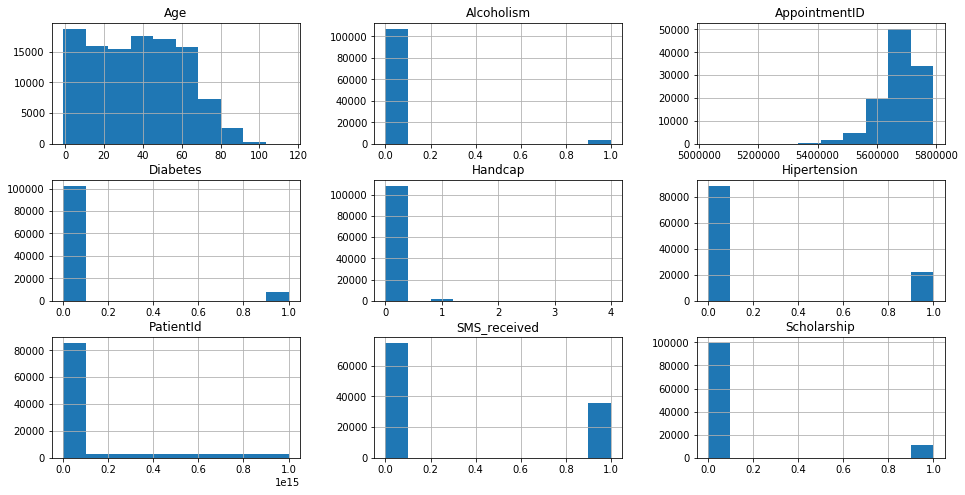

In [9]:
#Finally we let us show the histograms of the columns with numeric values to get an idea of the distribution of data
df.hist(figsize = (16, 8));

### Summary General Properties

- The dataframe contains 14 columns & 110527 rows
- It doesn't have missing data
- The data is gathered for a time frame of 26 days 
- The oldest person in the data frame is 115 years old
- PatientID contains duplicates: Same patients can schedule more than one appointment
- Each appointment has an unique ID
- ScheduledDay contains data about time, AppointmentDay doesn't
- "Age" has negative values
- "0" is generally used for "false" and "1" for "true"
- "Handicap is spelled wrongly and differs from the other illnesses. Instead of true and false values, it counts the number of disabilities. 
- The values in 'no-show' can have a missleading interpretation. "Yes"  means not attended and "no" means attended.The hyphen inside the name "No-show" can cause problems during the analysis. **Update: We'll rename our column to "Attendance" and convert our values to boolean datatypes.**
- Age and neighborhoud are containing a lot of unique values. Age can be easily clusted into groups, neighborhoud doesn't


#### Data Types
- String: Gender, ScheduledDay, AppointmentDay, Neighbourhood, No-show    
- Integer: AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received       
- Float: PatientId



### Data Cleaning

 After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

Based on our summary of the general data assesment we can draw conclusinons for our data cleaning steps we would like to perform:

1. Drop negative values in column "Age". Age has to be >= 0. 

2. Drop col~umns, we don't need for the analysis 
    - AppointmentID:  This column contains insignificant data. 
    - PatientID: This column contains significant data, which we won't use in the analysis. 
    - Neighbourhood: Too many unique neighborhoods and not enough information about each neighborhoods to cluster them into groups with same characteristics, won't be part of this analysis. 
    
3. Rename values within columns 
    - Handcap:
        - From 0 to 0(false) 
        - From 1 - 4 to 1(true)
    
4. Convert Data types in columns to make them useable for the analysis 
    - String to Datetime: ScheduledDay, AppointmentDay
    - Integer to Boolean: Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received 
    - **Update: String to Boolean: No-show**
    
5. Rename Columns 
    - From Handcap to Handicap
    - **Update: From No-show to Attendance** 
   
6. Create new columns for further conclusions 
    - "WaitingTime": Period of time between 'ScheduledDay'and 'AppointmentDay' can give indication wether waiting time has impact on no show rate. 
    - "WaitGroup": Puts different appointments into groups based on the timeframe of waiting between 'ScheduledDay'and 'AppointmentDay'
    - "AgeGroup": Puts different appointments into groups based on the patients age
    - "Illness": Puts different appointments into groups based wether the patient has an illness or not; based on the four illnesses we have data for 
    
7. Further changes of the dataset witch appear as neccessary during the analysis 
    - Drop negative "WaitingTime"


#### 1. Drop negative values in column "Age"

In [10]:
#Identify negative values in column "Age"
neg_age = df.query('Age < 0')
neg_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
#Drop negative values in column "Age" & test if negative values in column "Age" are still remaining 
df.drop(neg_age.index,inplace = True)
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### 2. Drop columns, we don't need for the analysis 

In [12]:
#Drop column AppointmentID & Neighbourhood
df.drop(['PatientId','AppointmentID','Neighbourhood'],axis = 1, inplace = True)
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### 3. Rename values within columns 

In [13]:
#Rename values in column "Handicap" & test if  values greater 1 are still remaining in column "Handicap" 
df['Handcap']= pd.cut(df['Handcap'],[-1,1,5], labels=[0,1])
df.query('Handcap > 1')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### 4. Convert Data types in columns to make them useable for the analysis 

In [14]:
#Convert ScheduledDay, AppointmentDay from String to Datetime without information about time 
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay']).dt.date

In [15]:
#Convert Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received from Integer to Boolean
boollist = ['Scholarship','Hipertension','Diabetes', 'Alcoholism','Handcap','SMS_received']
for a in boollist:
    df[a] = df[a].astype(bool)

In [16]:
#Update: Convert No-show from Sting to Boolean
#Remark: in the following steps will rename "No-show" to "Attendance"
df['No-show'].replace ({'Yes': False, 'No': True}, inplace = True )

In [17]:
#Test if converting was successfull 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Scholarship       110526 non-null bool
Hipertension      110526 non-null bool
Diabetes          110526 non-null bool
Alcoholism        110526 non-null bool
Handcap           110526 non-null bool
SMS_received      110526 non-null bool
No-show           110526 non-null bool
dtypes: bool(7), int64(1), object(3)
memory usage: 5.0+ MB


#### 5. Rename columns 

In [18]:
#Rename columns and test changes
df = df.rename(columns = {'Handcap':'Handicap','No-show':'Attendance'})
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance


#### 6. Create new columns 
**Waiting Time** 

In [19]:
 # Create new Column "WaitingTime" as Integer
df['WaitingTime'] = df['AppointmentDay']-df['ScheduledDay']
df['WaitingTime']=df['WaitingTime'].dt.days
df.describe()

,Age,WaitingTime
count,110526.000000,110526.000000
mean,37.089219,10.183794
std,23.110026,15.255034
min,0.000000,-6.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


As we see, we have negative values for waiting time. We will drop them from our data frame 

In [20]:
#New Dataframe for negative waiting time "neg_waiting_time" -> 5 rows
neg_waiting_time = df.query('WaitingTime<0')
neg_waiting_time

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,WaitingTime
27033,M,2016-05-10,2016-05-09,38,False,False,False,False,False,False,False,-1
55226,F,2016-05-18,2016-05-17,19,False,False,False,False,False,False,False,-1
64175,F,2016-05-05,2016-05-04,22,False,False,False,False,False,False,False,-1
71533,F,2016-05-11,2016-05-05,81,False,False,False,False,False,False,False,-6
72362,M,2016-05-04,2016-05-03,7,False,False,False,False,False,False,False,-1


In [21]:
#Drop values with negative waiting time from dataframe and test changes
df.drop(neg_waiting_time.index,inplace = True)
df.query('WaitingTime<0')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,WaitingTime


**Wait_Group** 

Since we have so many different values for WaitingTime (see unique values  above), we will cluster the appointments based on this column into groups to make them more comparable

We'll have 11 differnet groups: 
- 01_same day: WaitingTime = 0 days
- 02_one day: WaitingTime = 1 day
- 03_two days: WaitingTime = 2 days
- 04_three days: WaitingTime = 3 days
- 05_one week: WaitingTime = 4-7 days
- 06_two weeks: WaitingTime = 8-14 days
- 07_three weeks: WaitingTime = 15-21 days
- 08_one month: WaitingTime = 22-30 days
- 09_two months: WaitingTime = 31-60 days
- 10_three months: WaitingTime = 61-90 days
- 11_>three months: WaitingTime = >90 days

In [22]:
 # Create new Column "Wait_group" with the groups we defined above
wait_edges = [-1,0,1,2,3,7,14,21,30,60,90,200]
wait_names = ['01_same day','02_one day','03_two days','04_three days','05_one week','06_two weeks','07_three weeks','08_one month','09_two months','10_three months','11_>three months']
df['Wait_group']= pd.cut(df['WaitingTime'],wait_edges, labels = wait_names)

**Age_Group** 

Since we have so many different values for "Age" (see unique values above), we will cluster the appointments based on this column into groups to make them more comparable.

We'll have 11 differnet groups: 
- 0-12: Age = 0 -12 years
- 13-19: Age = 13-19 years
- 20-29: Age = 20-29 years
- 30-39: Age = 30-39 years
- 40-49: Age = 40-49 years
- 50-59: Age = 50-59 years
- 60-69: Age = 60-69 years
- 70-79: Age = 70-79 years
- 80-89: Age = 80-89 years
- 90-99: Age = 90-99 years
- '>100': Age = >100 years

In [23]:
# Create new Column "Age_group" with the groups we defined above
bin_edges = [-1,12,19,29,39,49,59,69,79,89,99,119]
bin_names = ['0-12','13-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','>100']
df['Age_group']= pd.cut(df['Age'],bin_edges, labels = bin_names)

**Illness**

We create a new column and are puting different appointments into groups based wether the patient has an illness or not (Condition: The value of one illness has to be "True")

In [24]:
# Create new column "Illness" with function np.select. 
#One of the illnesses needs the value "True". If non is True the output for the new column will be "false"

conditions = [
    df['Hipertension']== True, 
    df['Diabetes']== True, 
    df['Alcoholism'] == True,
    df ['Handicap']== True
             ]
output = [True,True,True,True] 

Ill = np.select(conditions,output,False)
df['Illness']= pd.Series(Ill)
df['Illness']= df['Illness'].astype(bool)

In [25]:
#Test success of changes
df.head(20)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,WaitingTime,Wait_group,Age_group,Illness
0,F,2016-04-29,2016-04-29,62,False,True,False,False,False,False,True,0,01_same day,60-69,True
1,M,2016-04-29,2016-04-29,56,False,False,False,False,False,False,True,0,01_same day,50-59,False
2,F,2016-04-29,2016-04-29,62,False,False,False,False,False,False,True,0,01_same day,60-69,False
3,F,2016-04-29,2016-04-29,8,False,False,False,False,False,False,True,0,01_same day,0-12,False
4,F,2016-04-29,2016-04-29,56,False,True,True,False,False,False,True,0,01_same day,50-59,True
5,F,2016-04-27,2016-04-29,76,False,True,False,False,False,False,True,2,03_two days,70-79,True
6,F,2016-04-27,2016-04-29,23,False,False,False,False,False,False,False,2,03_two days,20-29,False
7,F,2016-04-27,2016-04-29,39,False,False,False,False,False,False,False,2,03_two days,30-39,False
8,F,2016-04-29,2016-04-29,21,False,False,False,False,False,False,True,0,01_same day,20-29,False
9,F,2016-04-27,2016-04-29,19,False,False,False,False,False,False,True,2,03_two days,13-19,False


In [26]:
#Test success of changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
Gender            110521 non-null object
ScheduledDay      110521 non-null object
AppointmentDay    110521 non-null object
Age               110521 non-null int64
Scholarship       110521 non-null bool
Hipertension      110521 non-null bool
Diabetes          110521 non-null bool
Alcoholism        110521 non-null bool
Handicap          110521 non-null bool
SMS_received      110521 non-null bool
Attendance        110521 non-null bool
WaitingTime       110521 non-null int64
Wait_group        110521 non-null category
Age_group         110521 non-null category
Illness           110521 non-null bool
dtypes: bool(8), category(2), int64(2), object(3)
memory usage: 6.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have cleaned our data, we can beginn with the exploratory data analysis. Here we're going to answer our research questions defined aboth. 

**Update: To answers this questions we'll programe a modul for the attendence ratio depending on specific variables**

In [27]:
# Update: Fullfillment of the requirements of the first project 
# Aim: The function calculates the attendance ratio for a specific variable
# Inputs: dataframe, one or two variables (column names) for which we want to calculate the 
# attendence-ratio, and the column attendance (argument is optional, since default is 
# already set)
# Output: Returns the attendance ratio depending on "grpVar". In case of two variables, we will
# use unstack() to move row indices to column indices to make our plotting easier. 
# Remark: "len(grpVar)== 2" can be missleading in case that we use one variable with only 
# 2 letters. We don't have this case in our investigation - that's why it will stay as it is 
# with this remark. 

def attendanceRatio(df, grpVar, attendance = 'Attendance'):
    # Use unstack() in case of 2 variables (see remark above)
    if len(grpVar)== 2:
        return df.groupby(grpVar)[attendance].mean().mul(100).unstack()
    # In case of one variable, we won't need unstack()
    else:        
        return df.groupby(grpVar)[attendance].mean().mul(100)

### 1. How many patients of the dataset attended their appointment in total?

In [28]:
#Count values of column "No_show"
df['Attendance'].value_counts()

True     88207
False    22314
Name: Attendance, dtype: int64

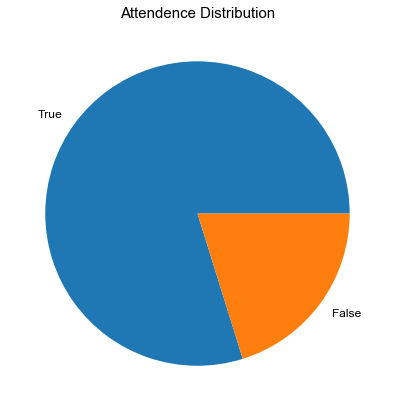

In [29]:
#Visualize result in pie chart
df['Attendance'].value_counts().plot(kind='pie', figsize = (7,7), fontsize = 12)
plt.title("Attendence Distribution", fontsize = 15)
plt.ylabel('', fontsize = 12)
sns.set_style("whitegrid");

**Result:** 
The patients of the dataset showed up on 88.207 appointments and didn't attend in 22.314 cases.

### 2.  Does the attendence depend on gender and age?
First we'll have a look on the question, whether men or women attend in more cases on doctor appointments:

In [30]:
#create a new dataset "df_attend" for all attended appointments and count values for men and women
#In the following we'll use this dataset for many research questions
df_attend = df.query('Attendance == True')
df_attend['Gender'].value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

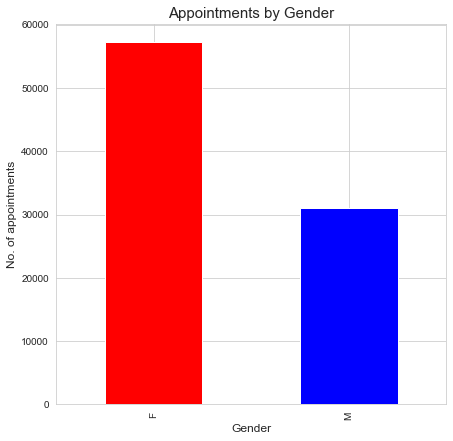

In [31]:
##Visualize result in bar chart
df_attend['Gender'].value_counts().plot(kind='bar', figsize = (7,7), color = ['red','blue'])
plt.title("Appointments by Gender", fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('No. of appointments', fontsize = 12)
sns.set_style("whitegrid");

57.245 women showed up on their appointments. This is the vast majority in comparison to men, who attended in 30.962 cases.

To attain a better understanding of this finding, we will compare the ratio of the attended groups in comparison to all appointments in the following. Moreover we will cluster the patients into groups depending on their age. For this we'll use the new column Age Group. 

In [32]:
# Use modul attendanceRatio for the column "Gender" to receive the attendance ratio 
# of it's values
genderRatio = attendanceRatio (df,'Gender')
genderRatio

Gender
F    79.688457
M    80.036190
Name: Attendance, dtype: float64

The attendance ratio for men and women are almost equal. The Gender doesn't seem to have an impact on the attendance.

In [33]:
# Use modul attendanceRatio for the column "Age_Group" and "Gender"  to receive the attendance ratio 
# of it's values 
genderAgeRatio = attendanceRatio (df,['Age_group','Gender'])
genderAgeRatio

Gender,F,M
Age_group,,
0-12,79.545001,79.515118
13-19,74.578791,73.072289
20-29,75.081449,76.043710
30-39,78.406241,77.878719
40-49,79.308581,80.663357
50-59,82.492362,82.516792
60-69,84.313725,86.223153
70-79,84.613435,85.168426
80-89,84.723618,83.246073


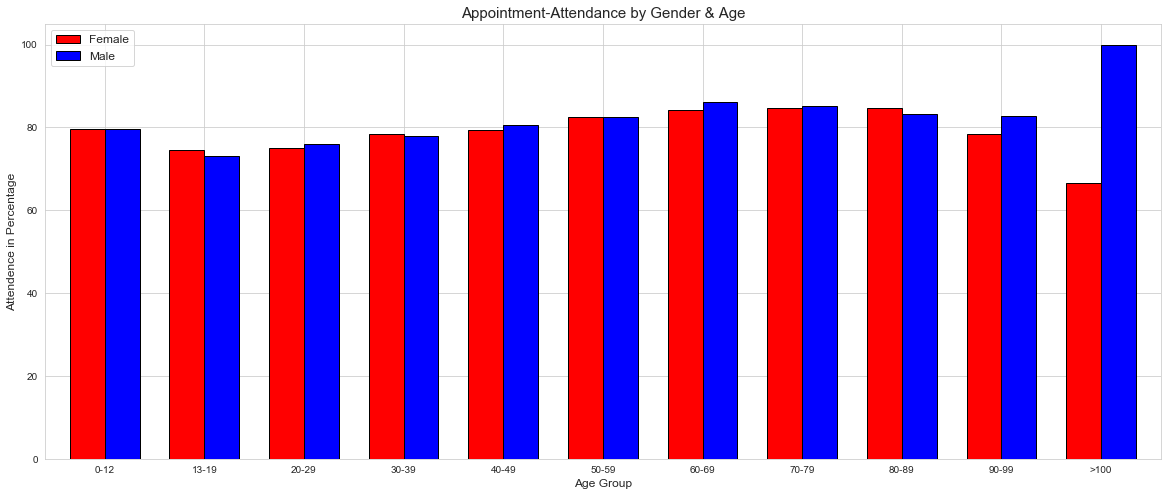

In [34]:
#Visualize results in bar chart
genderAgeRatio.plot.bar(edgecolor = 'black', figsize = [20,8],width = 0.7, rot = 0, color = ['r','b'])
plt.title('Appointment-Attendance by Gender & Age', fontsize = 15)
plt.xlabel('Age Group', fontsize = 12)
plt.ylabel ('Attendence in Percentage', fontsize = 12)
plt.legend(['Female','Male'], fontsize = 12)
sns.set_style("whitegrid");

**Result:** 
In comparison to our result, that a lot more women attend in doctor appointments then men, we found that the no show ratio for both gender is more or less the same. 

Since we only have 11 persons in the age group ">100", our results can become inconclusive for this group. We would need a larger sample.

In contrast to this result, our data shows that age has an impact on the attendence rate. Young children (age group 0-12) and adults have a greater attendence ratio than young adults.


### 3.  Does the attendence depend on a particular illness?

In [35]:
# Use modul attendanceRatio for the column "Illness" to receive the attendance ratio 
# of it's values
illnessRatio = attendanceRatio (df,'Illness')
illnessRatio

Illness
False    79.324350
True     81.444194
Name: Attendance, dtype: float64

Ill people of this dataset have an attandence ratio of 81,44%, healthy people of 79,32%. 

In the following we will have a look, if a higher attendence is linked to a particular illness and will visualize 
the results. 

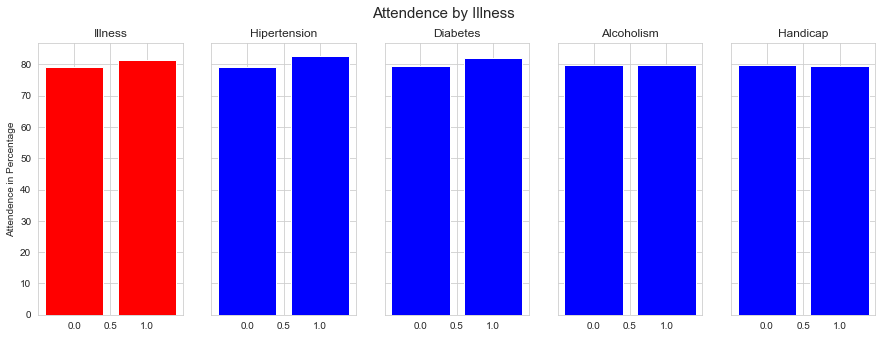

In [36]:
#Visualisation of results: We'll plot 5 bar charts next to each other. 
# The first chart in red will show the overall attendence ratio for ill and healthy people (Ill = 1, healthy = 0)
# Chart 2-5 will visualize the attendence rate based on a particular illness(Ill = 1, healthy = 0)

#Plot of 5 charts next to each other 
fig, axs = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Attendence by Illness', fontsize = 15)

#Plot first chart in red -> Overall attendence ratio for ill and healthy people
axs[0].bar([False,True], illnessRatio, color = 'r')
axs[0].title.set_text('Illness')
axs[0].set_ylabel('Attendence in Percentage')


#loop for plotting chart 2-5 - same procedure as for "illness overall" (-> Use of modul attendanceRatio) )
Illlist = ['Hipertension','Diabetes','Alcoholism','Handicap']
b = 1
for a in Illlist:
    illlistRatio = attendanceRatio (df, a)
    axs[b].bar([False,True], illlistRatio, color = 'b')
    axs[b].title.set_text(a)
    b = b+1
    sns.set_style("whitegrid");

**Result:** 
In this data set ill people generally attend more often doctor appointments than healthy ones. This is caused by a higher attendence of people with hypertension and diabetes. Alocoholism and handicaps don't have an impact on the attendance ratio in this dataset.

Unfortunatly we don't have any further information about acute illnesses of the patients in this data set. Usually we would expect that mainly ill people go to the doctors. In this dataset only four chronic diseases were documentated.


### 4. Does the attendence depend on the receipt of the financial aid from "Bolsa Família"?

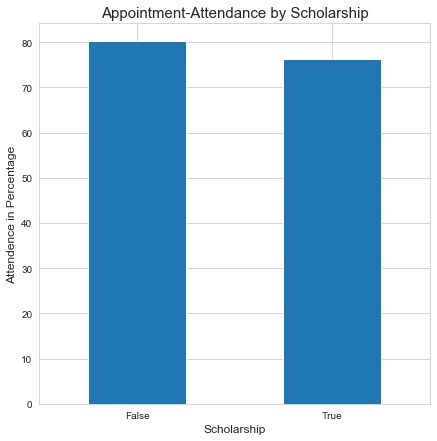

In [37]:
# Use modul attendanceRatio for the column "Scholarship" to receive the attendance ratio 
# of it's values 
# people with (=true) and without (=false) social aid "Bolsa Familia"
#Visualize results in bar chart

attendanceRatio (df, 'Scholarship').plot(kind='bar', figsize = (7,7), rot= 0)
plt.title('Appointment-Attendance by Scholarship', fontsize = 15)
plt.xlabel('Scholarship', fontsize = 12)
plt.ylabel ('Attendence in Percentage', fontsize = 12)
sns.set_style("whitegrid");

**Result:** 
In this dataset people without financial aid generally attend more often doctor appointments (=80,2%) than people who aren't part of "Bolsa Familia" (=76,26%). That doesn't imply that people who receive financial aid, would go more often to their appointment if they didn´t receive it. 

### 5. Does the attendence depend on a the timeframe between scheduling and the actual appointment date?

To answer the question we'll display the mean waiting time for people who attendend and not attended their appointment. 

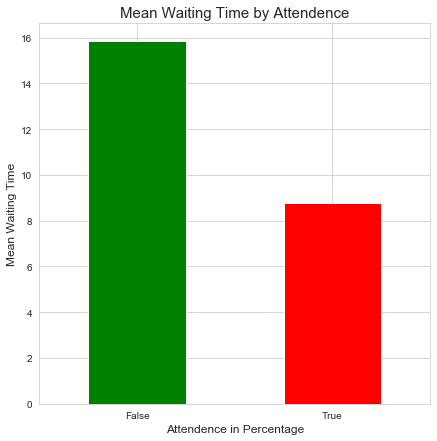

In [38]:
#Group the data frame by the column no_show and plot the mean waiting time
# Visualize the result in a bar chart 

df.groupby('Attendance')['WaitingTime'].mean().plot(kind = 'bar',figsize = (7,7), color = ['g','r'], rot = 0 )
plt.title('Mean Waiting Time by Attendence', fontsize = 15)
plt.xlabel('Attendence in Percentage', fontsize = 12)
plt.ylabel ('Mean Waiting Time', fontsize = 12)
sns.set_style("whitegrid");

**Result**: The mean waiting time for people who attended their meeting is approx. 9 days, for people who didn't is aprox. 16 days, which is compared one week longer. The time frame between scheduling and the actual appointment date has a big impact on the attendance rate. 

### 6. Does the receiving of a SMS prior to the appointment has a positive effect on the attendence rate?

Before we answer this question we want to get familiar with the quantity structure of the time frame when SMS were send. 

In [39]:
# Create a new dataset "df_SMS" for all appointments where a reminder was sended via SMS 
# and count values for the waitgroup
#count values for waitgroup in df
#count values for all persons who were ill and were not ill in df
#Divide the counts for the people who received a sms with the counts of all people to receive the SMS-receive-ratio 

df_SMS = df.query('SMS_received == True')
totals_SMS = df_SMS['Wait_group'].value_counts()
wait_total = df['Wait_group'].value_counts()
prop_SMS_received = totals_SMS/wait_total
prop_SMS_received

01_same day         0.000000
02_one day          0.000000
03_two days         0.000000
04_three days       0.331019
05_one week         0.607767
06_two weeks        0.582453
07_three weeks      0.589475
08_one month        0.622455
09_two months       0.610769
10_three months     0.645367
11_>three months    0.640553
Name: Wait_group, dtype: float64

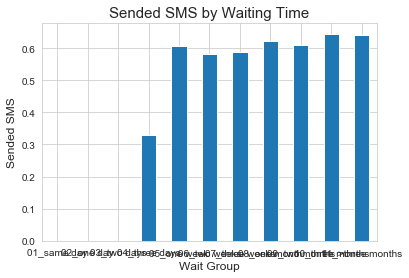

In [40]:
# Visualize the result in a bar chart 
prop_SMS_received.plot(kind= 'bar', rot = 0)
plt.title('Sended SMS by Waiting Time', fontsize = 15)
plt.ylabel('Sended SMS', fontsize = 12)
plt.xlabel ('Wait Group', fontsize = 12)
sns.set_style("whitegrid");

**Result**: The first SMS were send after three days between scheduling und attending an apointment. After 4 days the send-ratio is between 58% and 65%. Now we will focus on the effect of attendence by sending SMS.

In [41]:
# Use modul attendanceRatio for the columns "Wait_Group" & "SMS_received" to receive the attendance ratio 
# of it's values
smsWaitRatio = attendanceRatio (df, ['Wait_group','SMS_received'])
smsWaitRatio

SMS_received,False,True
Wait_group,,
01_same day,95.352938,NaN
02_one day,78.649530,NaN
03_two days,76.178439,NaN
04_three days,75.368651,78.697572
05_one week,72.888759,76.028942
06_two weeks,66.241785,71.887493
07_three weeks,64.068076,70.330721
08_one month,62.063591,70.069957
09_two months,61.631514,68.531330


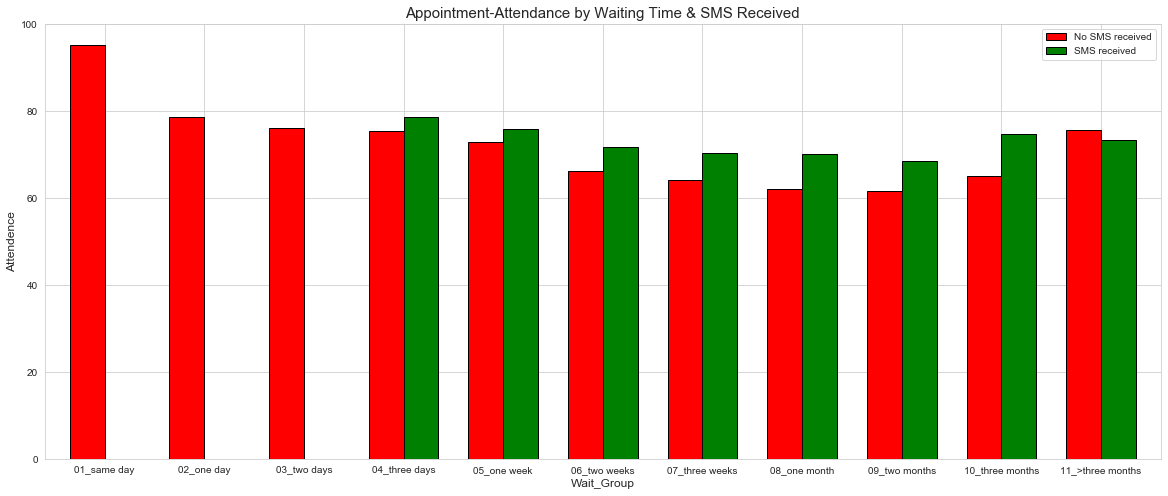

In [42]:
# Visualize the result in a bar chart 

smsWaitRatio.plot.bar(edgecolor = 'black', figsize = [20,8],width = 0.7, rot = 0, color = ['r','g'])
plt.title('Appointment-Attendance by Waiting Time & SMS Received', fontsize = 15)
plt.xlabel('Wait_Group', fontsize = 12)
plt.ylabel ('Attendence', fontsize = 12)
plt.legend(['No SMS received', 'SMS received'])
plt.rcParams["figure.figsize"] = (20,5)
sns.set_style("whitegrid");

**Result**: 
The bigger the time frame between scheduling and the actual meeting, the lower the attendence ratio, exept for group "10_three months" and "11_>three months". In the following we will examine if the sample for those groups is big enough for this conclusion. 

More over we see, that sending SMS has a posive effect on the attendence ratio (Exeption: "11_>three months" ).

In [43]:
# Count values for the waitgroup for the whole data frame
WaitingTotal = df['Wait_group'].value_counts()
WaitingTotal

01_same day         38562
05_one week         17510
06_two weeks        12025
07_three weeks       8874
08_one month         8497
09_two months        8283
03_two days          6725
02_one day           5213
04_three days        2737
10_three months      1878
11_>three months      217
Name: Wait_group, dtype: int64

The bigger the time frame between scheduling and the actual appointment the smaler the sample. This means that our data and our result becomes less significant.  

<a id='conclusions'></a>
## Conclusions

Now we have seen a lot variables that can effect the attendance rate. Nethertheless, our variables might display some correlations, which don't imply any causation between those. In the following section we'll summarize our findings and the results and point out limitations, where additional research can be done or where additional information could be useful:

- **How many patients of the dataset attended their appointment in total?**

The patients of the dataset showed up on 88.207 appointments and didn't attend in 22.314 cases, with is approx. in 25% of the cases. Same patients could be count several times. This is a limit we also have to point out for the further questions. The same patient could have been counted several times for age group, illness or attendence in "Bolsa Familia". We just analyzed the number of appointments.

- **Does the attendence depend on gender and age?** 

57.245 women showed up on their appointments. This is the vast majority in comparison to men, who attended in 30.962 cases.

In comparison to our result, that a lot more women attend in doctor appointments then men, we found that the no show ratio for both gender is more or less the same. 

In contrast to this result, our data shows that age has an impact on the attendence rate. Young children  (age group 0-12) and adults have a greater attendence ratio than young adults. 

We don't know if age is cause for the attendence ratio. it could be an explenation, that a higher-attendence rate by older people is caused by their maturity or just because of the fact, that older people do have more illnesses and need more urgent appraisals by doctors. Young children could be accompanied by their parants. Moreover we don't know why woman schedule more often appointments, if they take more care of their health or if they are more ill. These questions would need further investigations.

The data for the age group ">100" is inconclusive because of the small sample. 

- **Does the attendence depend on a particular illness?**

Ill people of this dataset have an attandence ratio of 81,61%, healthy people of 79,27%. This is no big difference. 

Unfortunatly we don't have any further information about acute illnesses of the patients in this data set. Usually we would expect that mainly ill people go to the doctors. In this dataset only four chronic diseases were documentated.

Patients with hypertension and diabetes attend more often in appointments. Alocoholism and handicaps don't have an impact on the attendance ratio in this dataset.

- **Does the attendence depend on the receipt of the financial aid from "Bolsa Família"?**
 
In this dataset people without financial aid generally attend more often doctor appointments (=80,2%) than people who aren't part of "Bolsa Familia" (=76,26%). That doesn't imply that people who receive financial aid, would go more often to their appointment if they didn´t receive it. 

- **Does the attendence depend on a the timeframe between scheduling and the actual appointment date?**

The mean waiting time for people who attended their meeting is approx. 9 days, for people who didn't is aprox. 16 days, which is compared one week longer. The time frame between scheduling and the actual appointment date has a big impact on the attendance rate. 


- **Does the receiving of a SMS prior to the appointment has a positive effect on the attendence rate?**

The first SMS were send after three days between scheduling und attending an apointment. After 4 days the send-ratio is between 58% and 65%. The bigger the time frame between scheduling and the actual meeting, the lower the attendence ratio, exept for group "10_three months" and "11_>three months".

More over we see, that sending SMS has a posive effect on the attendence ratio (Exeption: "11_>three months").


> Finally we can say, that a higher age (adulthood) and the presence of illnesses have a positive effect on the attendence rate, in case of hipertension and diabetes. Woman schedule and attend more appointments in general, nethertheless is the attendece ration for women and men more or less equal. The attendence in the financial aid programm has a negetive effect on the attendence rate. Alcoholism and handicaps don't have any impact on the rate. 

> In our investigation, we always looked for correlations between a varible and the attendence. Of course it's also possible that those varibales have also correlations with each other. It would be logical, if older people or people with low income (who need financial aid) had more illnesses, or if woman needed more often financial aid. Moreover we could have used the colomns "PatientID" and "Neighbourhood" for futher research topics. But these are questions for another investigation. 

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0